In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# reading vector data
geostat_2006_path = 'GEOSTAT_Grid_POP_2006_1K/Grid_ETRS89_LAEA_1K_ref_GEOSTAT_2006.shp'

In [4]:
geostat_2006_gdf = gpd.read_file(geostat_2006_path)

In [5]:
geostat_2006_gdf.head()

,GRD_INSPIR,geometry
0,1kmN1760E2636,"POLYGON ((2636000.000 1760000.000, 2636000.000..."
1,1kmN1954E2636,"POLYGON ((2636000.000 1954000.000, 2636000.000..."
2,1kmN1960E2636,"POLYGON ((2636000.000 1960000.000, 2636000.000..."
3,1kmN1961E2636,"POLYGON ((2636000.000 1961000.000, 2636000.000..."
4,1kmN1760E2637,"POLYGON ((2637000.000 1760000.000, 2637000.000..."


In [6]:
geostat_2006_gdf['GRD_ID'] = geostat_2006_gdf['GRD_INSPIR']

In [7]:
# reading supplementary tabular data
tabstat_2006_path = 'GEOSTAT_Grid_POP_2006_1K/GEOSTAT_grid_EU_POP_2006_1K_V1_1_1.csv'

In [8]:
tabstat_2006_df = pd.read_csv(tabstat_2006_path, sep = ';')

In [9]:
tabstat_2006_df.head()

,GRD_ID,POP_TOT,YEAR,METHD_CL,CNTR_CODE,DATA_SRC
0,1kmN5142E2862,2,2006,D,IS,AIT
1,1kmN5141E2862,13,2006,D,IS,AIT
2,1kmN5141E2864,211,2006,D,IS,AIT
3,1kmN5140E2862,1,2006,D,IS,AIT
4,1kmN5139E2876,33,2006,D,IS,AIT


In [10]:
# merging both dataset to supply polygons with population counts ('POP_TOT' attribute)
pop_2006_gdf = geostat_2006_gdf.merge(tabstat_2006_df, on = 'GRD_ID')

In [11]:
pop_2006_gdf.head()

,GRD_INSPIR,geometry,GRD_ID,POP_TOT,YEAR,METHD_CL,CNTR_CODE,DATA_SRC
0,1kmN1760E2636,"POLYGON ((2636000.000 1760000.000, 2636000.000...",1kmN1760E2636,24,2006,D,PT,PT
1,1kmN1954E2636,"POLYGON ((2636000.000 1954000.000, 2636000.000...",1kmN1954E2636,6,2006,D,PT,PT
2,1kmN1960E2636,"POLYGON ((2636000.000 1960000.000, 2636000.000...",1kmN1960E2636,1,2006,D,PT,PT
3,1kmN1961E2636,"POLYGON ((2636000.000 1961000.000, 2636000.000...",1kmN1961E2636,4,2006,D,PT,PT
4,1kmN1760E2637,"POLYGON ((2637000.000 1760000.000, 2637000.000...",1kmN1760E2637,1,2006,D,PT,PT


In [13]:
# filtering Slovakia's grids
sk_pop_2006_gdf = pop_2006_gdf.loc[pop_2006_gdf['CNTR_CODE'] == 'SK', :]

In [14]:
# checking the number of grids and the distribution of the population data
sk_pop_2006_gdf.shape

(14658, 8)

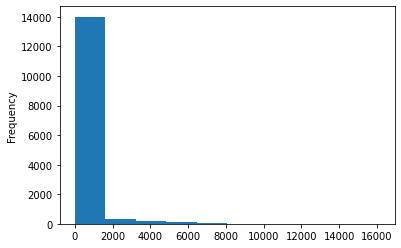

In [16]:
sk_pop_2006_gdf["POP_TOT"].plot.hist();

In [17]:
pop_2006_gdf["POP_TOT"].mean(), pop_2006_gdf["POP_TOT"].median()

(258.22074318468236, 30.0)

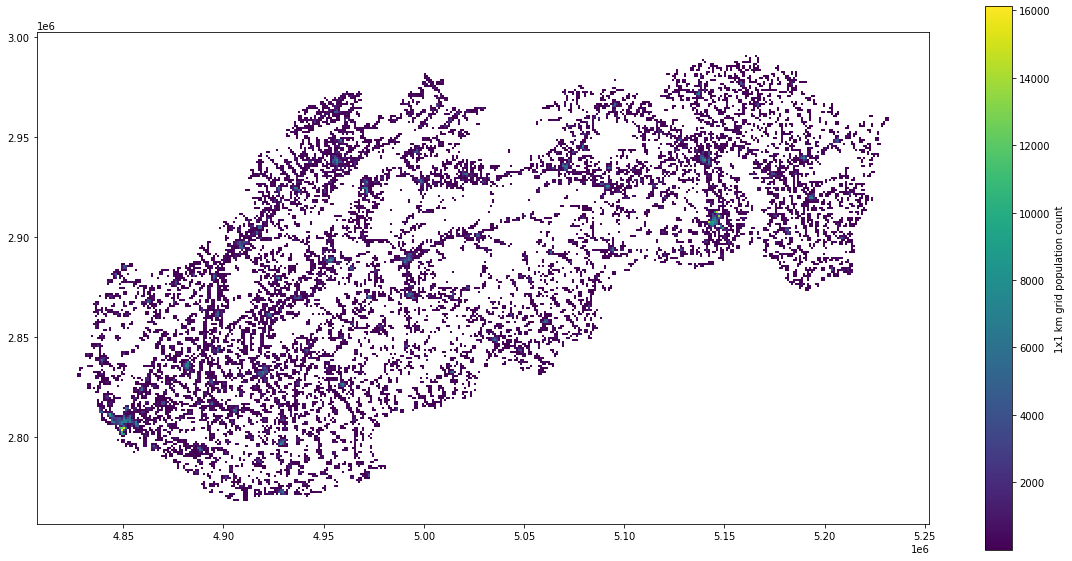

In [27]:
# plotting population data
sk_pop_2006_gdf.plot(column='POP_TOT', figsize=(20,10), cmap='viridis', legend=True, legend_kwds={"label": "1x1 km grid population count"});
plt.savefig('SK_population_2006.jpg', dpi=300);

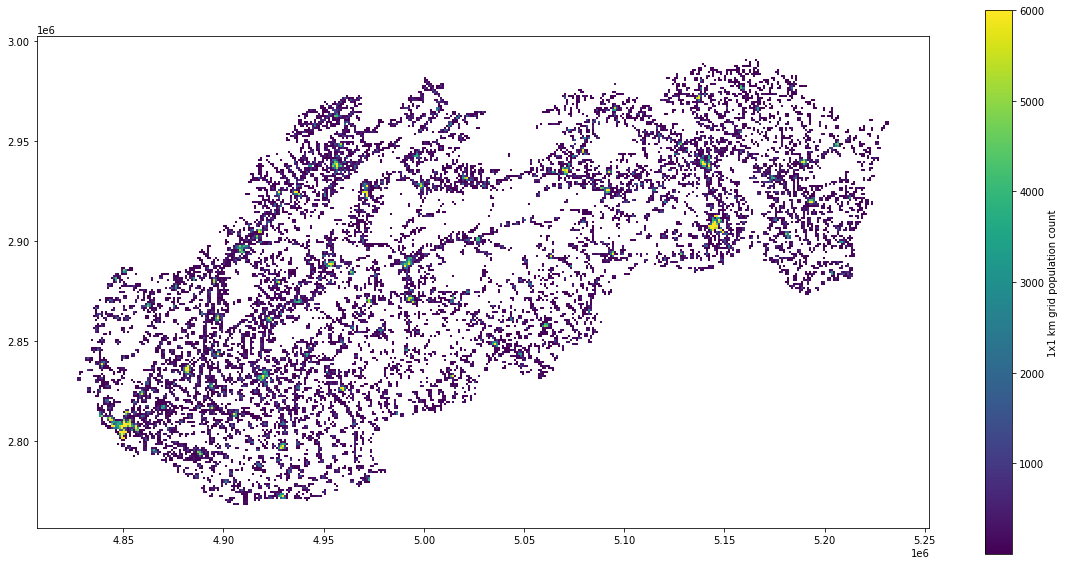

In [29]:
sk_pop_2006_gdf.plot(column='POP_TOT', figsize=(20,10), cmap='viridis', vmax=6000, legend=True, legend_kwds={"label": "1x1 km grid population count"});
plt.savefig('SK_population_2006_vmax_6000.jpg', dpi=300);